选中的特征索引: [ 2  7 20 22 27]
特征选择后的随机森林准确率: 0.9532163742690059
未进行特征选择的随机森林准确率: 0.9707602339181286


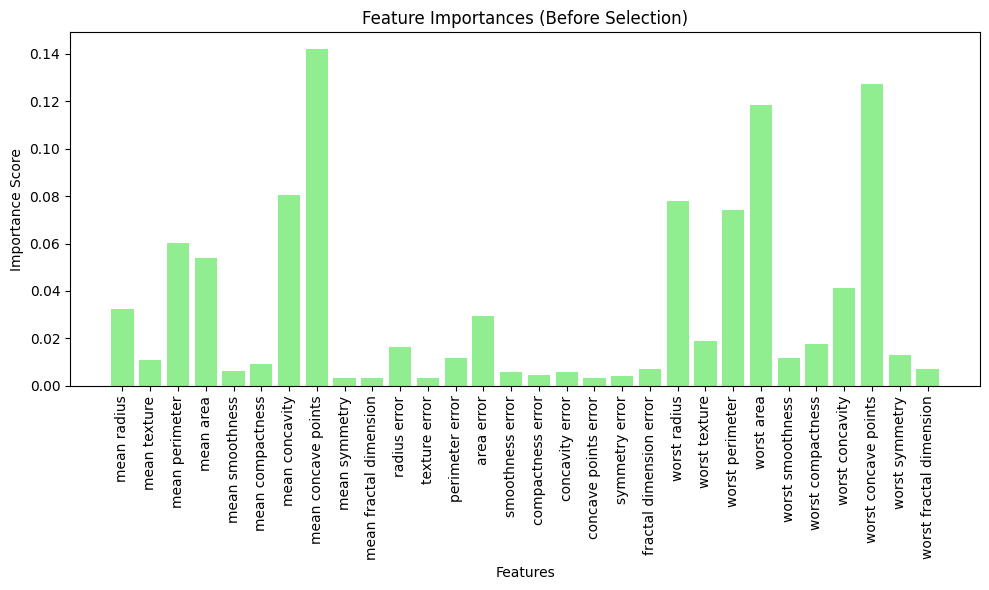

In [1]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. 加载乳腺癌数据集并准备数据
# 我们使用sklearn自带的乳腺癌数据集，目标是预测肿瘤是良性还是恶性
data = load_breast_cancer()
X = data.data  # 特征矩阵
y = data.target  # 目标变量（0: 恶性, 1: 良性）

# 数据集被划分为训练集和测试集，比例为7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. 使用过滤法进行特征选择（基于ANOVA F值）
# 我们选择最重要的5个特征（可以根据需要调整k值）
selector = SelectKBest(score_func=f_classif, k=5)  # 基于ANOVA F值选择特征
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# 打印特征选择结果
selected_features = selector.get_support(indices=True)
print("选中的特征索引:", selected_features)

# 3. 训练随机森林模型，并比较特征选择前后的模型性能
# 使用随机森林模型进行训练（特征选择后）
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# 对测试集进行预测，并计算准确率
rf_pred_selected = rf_model_selected.predict(X_test_selected)
print("特征选择后的随机森林准确率:", accuracy_score(y_test, rf_pred_selected))

# 对比未进行特征选择的模型性能
rf_model_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_full.fit(X_train, y_train)
rf_pred_full = rf_model_full.predict(X_test)
print("未进行特征选择的随机森林准确率:", accuracy_score(y_test, rf_pred_full))

# 4. 绘制特征重要性图，用于分析原始特征的重要性分布
# 使用未进行特征选择的模型绘制特征重要性图
feature_importances = rf_model_full.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, color='lightgreen')
plt.xticks(range(len(feature_importances)), data.feature_names, rotation=90)
plt.title("Feature Importances (Before Selection)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()